In [ ]:
# Blind Source Separation using ICA
#
# Objective:
# Use ICA to separate mixed audio signals (Cocktail Party Problem)
#
# Tasks:
# 1. Download or load 2 audio files (e.g., speech + music)
# 2. Create mixed signals by applying a random mixing matrix
# 3. Apply FastICA algorithm to separate original sources
# 4. Compare separated signals with original signals using correlation
# 5. Plot waveforms before and after ICA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile
import IPython.display as ipd

In [ ]:
# Load Audio Files
sr1, s1 = wavfile.read('data1.wav')
sr2, s2 = wavfile.read('data2.wav')

# Convert to mono if stereo
if s1.ndim > 1:
    s1 = s1.mean(axis=1)
if s2.ndim > 1:
    s2 = s2.mean(axis=1)

# Make lengths equal
min_len = min(len(s1), len(s2))
s1, s2 = s1[:min_len], s2[:min_len]

# Normalize signals
s1 = s1 / np.max(np.abs(s1))
s2 = s2 / np.max(np.abs(s2))

S = np.c_[s1, s2]  # Shape (n_samples, 2)
print("Shape of original sources:", S.shape)

Shape of original sources: (220568, 2)


Mixing matrix:
 [[0.37454012 0.95071431]
 [0.73199394 0.59865848]]


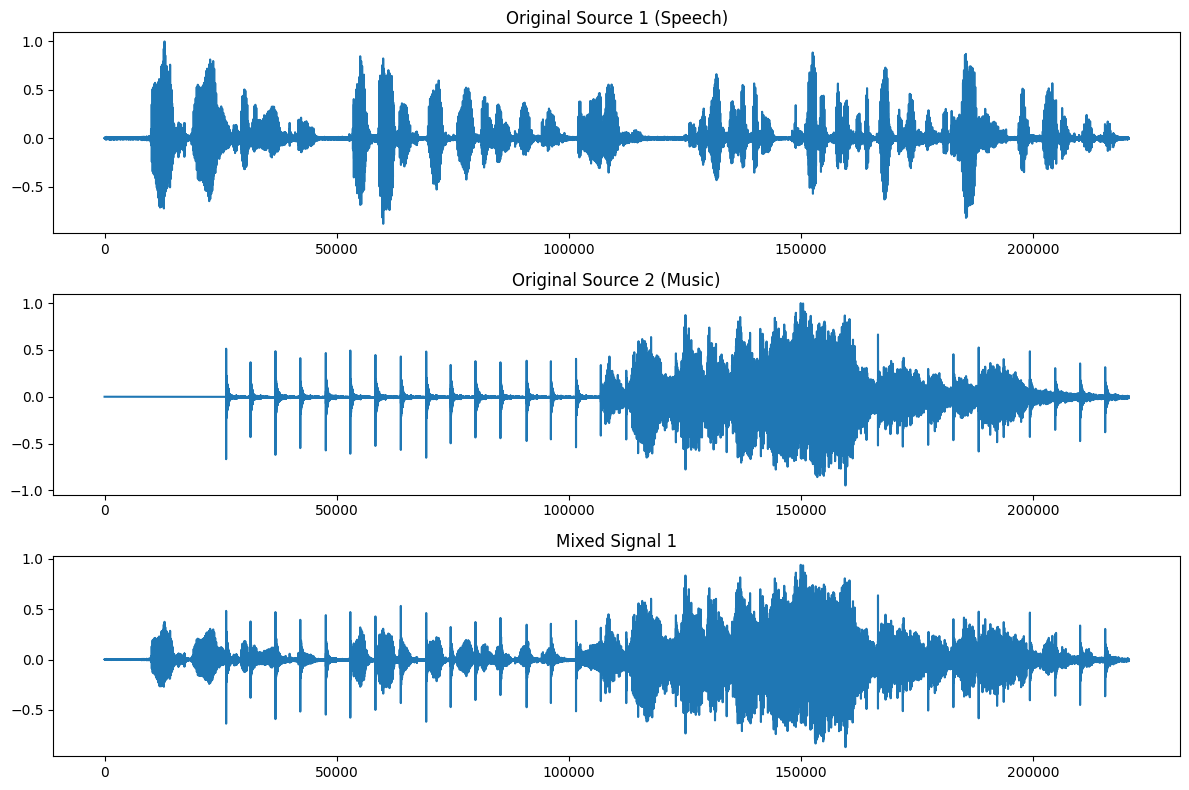

In [ ]:
# Mix Signals using a Random Mixing Matrix

np.random.seed(42)
A = np.random.rand(2, 2)  # Mixing matrix (2x2)
X = S @ A.T  # Mixed signals

print("Mixing matrix:\n", A)

# Listen to mixed signals
ipd.Audio(X[:, 0], rate=sr1)

# Plot original and mixed signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.title("Original Source 1 (Speech)")
plt.plot(S[:, 0])
plt.subplot(3, 1, 2)
plt.title("Original Source 2 (Music)")
plt.plot(S[:, 1])
plt.subplot(3, 1, 3)
plt.title("Mixed Signal 1")
plt.plot(X[:, 0])
plt.tight_layout()
plt.show()

In [ ]:
# Apply FastICA to Separate the Signals

ica = FastICA(n_components=2, random_state=42)
S_ica = ica.fit_transform(X)  # Reconstruct signals
A_est = ica.mixing_  # Estimated mixing matrix

print("Estimated Mixing Matrix:\n", A_est)

# Compare Recovered Sources with Original Signals (Correlation)

def correlation(a, b):
    return np.corrcoef(a, b)[0, 1]

corr1 = correlation(S[:, 0], S_ica[:, 0])
corr2 = correlation(S[:, 1], S_ica[:, 1])

print(f"Correlation Source1 ↔ ICA1: {corr1:.4f}")
print(f"Correlation Source2 ↔ ICA2: {corr2:.4f}")


Estimated Mixing Matrix:
 [[0.03790118 0.11486017]
 [0.07415434 0.07212328]]
Correlation Source1 ↔ ICA1: 1.0000
Correlation Source2 ↔ ICA2: 1.0000


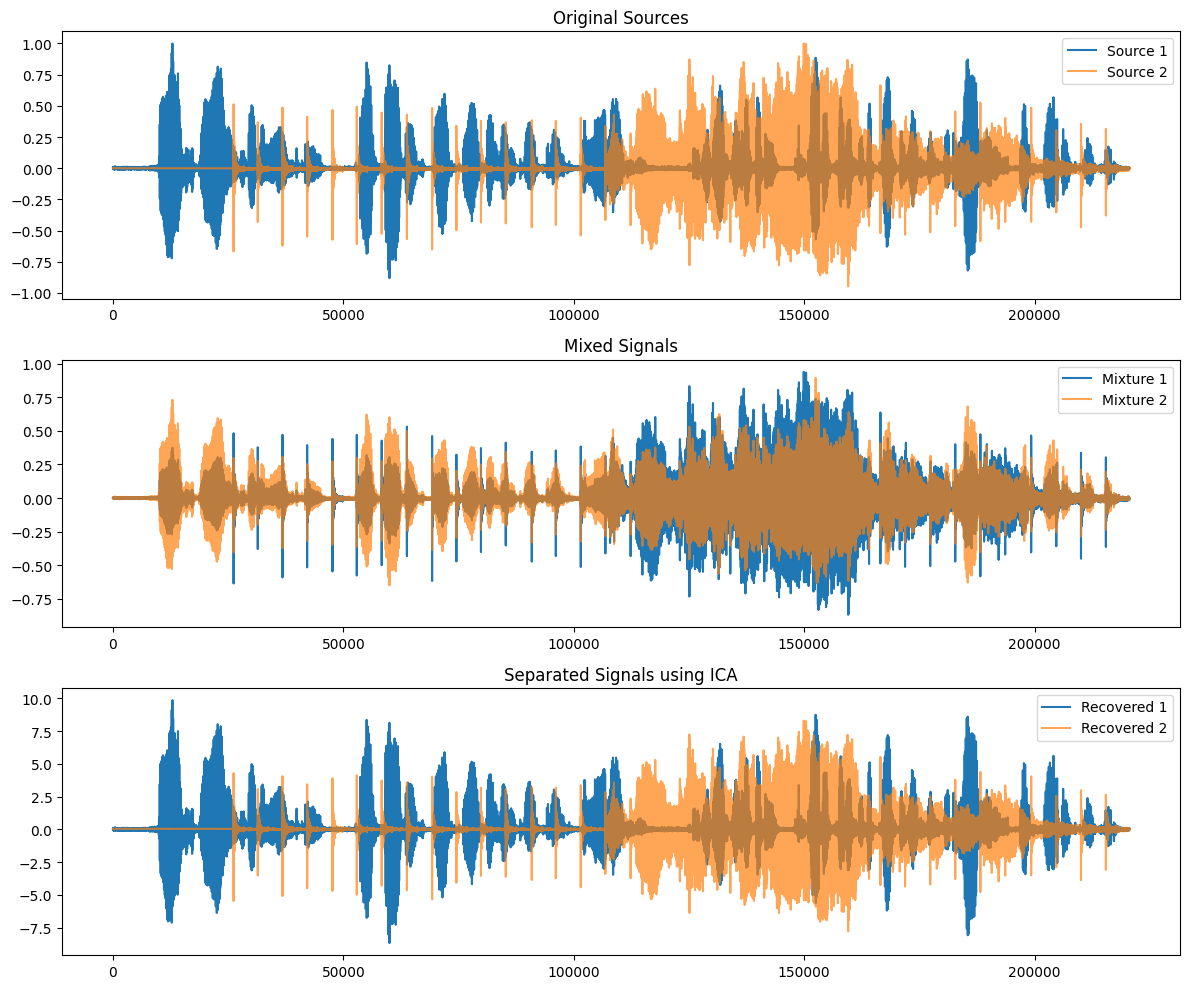

In [ ]:
# Plot Results Before and After ICA

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(S[:, 0], label="Source 1")
plt.plot(S[:, 1], label="Source 2", alpha=0.7)
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X[:, 0], label="Mixture 1")
plt.plot(X[:, 1], label="Mixture 2", alpha=0.7)
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Separated Signals using ICA")
plt.plot(S_ica[:, 0], label="Recovered 1")
plt.plot(S_ica[:, 1], label="Recovered 2", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Listen to Recovered Audio

# Normalize for playback
S_ica_norm = S_ica / np.max(np.abs(S_ica))

# Listen to recovered signals
print("Recovered Audio 1:")
ipd.Audio(S_ica_norm[:, 0], rate=sr1)

# %%
print("Recovered Audio 2:")
ipd.Audio(S_ica_norm[:, 1], rate=sr1)

Recovered Audio 1:
Recovered Audio 2:


In [ ]:
# link for the data files: https://share.google/qFcicNdfrceuUzEKR